In [23]:
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt

In [24]:
file = gzip.open('goemotions.json.gz')
json_file = json.load(file)

In [30]:
emotions = []
sentiments = []

for item in json_file:
    emotions.append(item[1])
    sentiments.append(item[2])

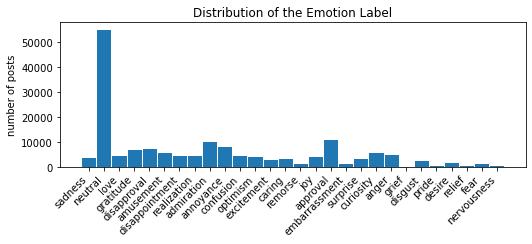

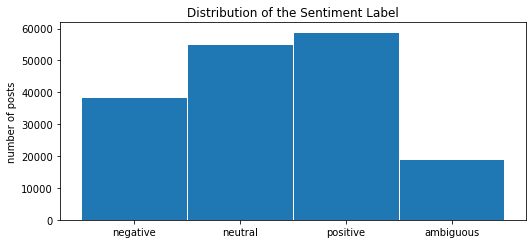

In [174]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.hist(emotions, bins=range(29), align="left", ec="white")
plt.xticks(rotation=45, ha="right")
plt.ylabel("number of posts")
plt.title("Distribution of the Emotion Label")
plt.savefig("emotion.pdf", format="pdf")
plt.show()
plt.ylabel("number of posts")
plt.hist(sentiments, bins=range(5), align="left", ec="white")
plt.title("Distribution of the Sentiment Label")
plt.savefig("sentiment.pdf", format="pdf")
plt.show()